,algo,n,time_s,throughput,ipc,llc_miss_pct,instructions,cycles,LLC_loads,LLC_misses
0,bubble,0,1.201151,0.00,1.101,62.037,3817802,3469152,8532,5293
1,bubble,1000,0.011584,86327.49,0.980,11.630,8757616,8934673,6956,809
2,bubble,2000,0.024281,82367.39,0.903,12.524,23921250,26493014,7202,902
3,bubble,3000,0.032978,90970.59,0.857,10.701,49035388,57201274,7074,757
4,bubble,4000,0.048210,82970.73,0.818,12.068,84267246,103019637,7358,888


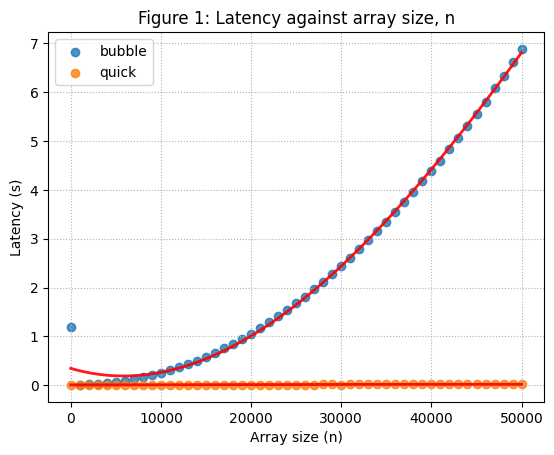

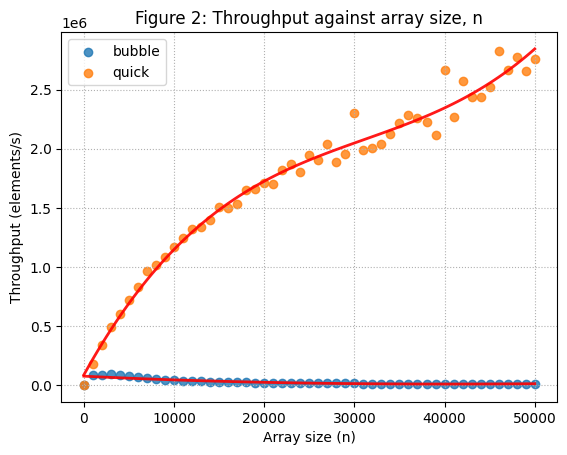

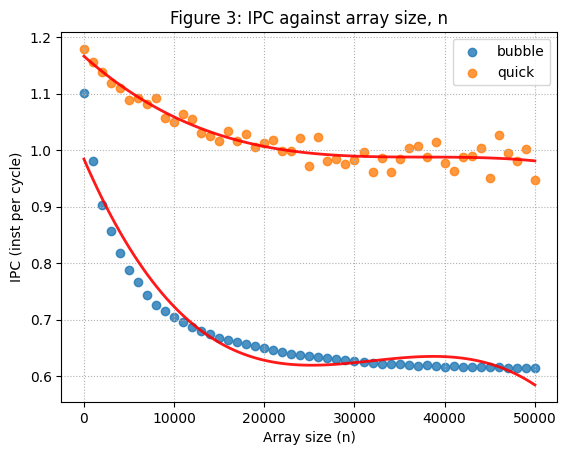

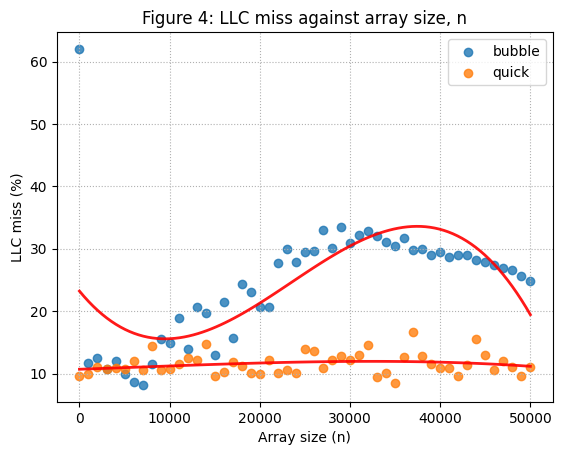

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CSV_PATH = "results.csv"  

df = pd.read_csv(CSV_PATH)
df = df.copy()
num_cols = ["n","time_s","throughput","ipc","llc_miss_pct",
            "instructions","cycles","LLC_loads","LLC_misses"]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# treat missing/zero time as NaN so plots skip it
df.loc[(~df["time_s"].notna()) | (df["time_s"]<=0), "time_s"] = np.nan
# recompute throughput if missing/zero but time is present
need_thr = (~df["throughput"].notna()) | (df["throughput"]<=0)
df.loc[need_thr & df["time_s"].notna(), "throughput"] = df["n"] / df["time_s"]

display(df.head())  # quick sanity peek

def plot_metric(metric, xlabel, ylabel, title=None):
    sub = df[df[metric].notna()]
    plt.figure()
    for algo, g in sub.groupby("algo"):
        sns.regplot(
            data=g.sort_values("n"),
            x="n", y=metric,
            label=algo,
            order=3,   
            scatter=True, 
            ci=None,
            line_kws={"color": "red", "lw": 2, "alpha": 0.9},
        )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle=":")
    if title: plt.title(title)
    plt.legend()
    plt.show()

plot_metric("time_s", "Array size (n)", "Latency (s)", "Figure 1: Latency against array size, n")
plot_metric("throughput", "Array size (n)", "Throughput (elements/s)", "Figure 2: Throughput against array size, n")
plot_metric("ipc", "Array size (n)", "IPC (inst per cycle)", "Figure 3: IPC against array size, n")
plot_metric("llc_miss_pct", "Array size (n)", "LLC miss (%)", "Figure 4: LLC miss against array size, n")
